<a href="https://colab.research.google.com/github/fareenamughal/Group-6-Crypto/blob/main/Machine%20learning/Machine_learning_Microsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 18.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
# Import yfinance
import yfinance as yf

# Get the data for the stock MSFT
start = '2014-09-17'

In [3]:
# Microsoft prediction

In [4]:
# Bringing data from yfinance to dataframe - Microsoft
df = yf.download('MSFT',start)

[*********************100%***********************]  1 of 1 completed


In [5]:
# Bringing data into csv file
df.to_csv('microsoft_data.csv', encoding='utf-8', index=False)

In [6]:
# Checking data in dataframe
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17 00:00:00-04:00,46.259998,46.689999,46.230000,46.520000,40.347469,38311900
2014-09-18 00:00:00-04:00,46.590000,46.830002,46.459999,46.680000,40.486244,35556600
2014-09-19 00:00:00-04:00,46.810001,47.570000,46.599998,47.520000,41.214806,202522400
2014-09-22 00:00:00-04:00,47.299999,47.380001,46.980000,47.060001,40.815834,38686100
2014-09-23 00:00:00-04:00,46.849998,46.980000,46.470001,46.560001,40.382183,33430300


In [7]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

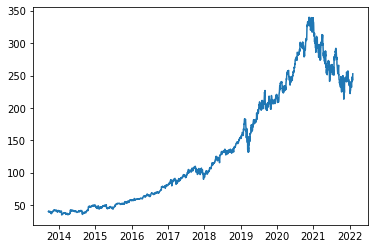

In [8]:
# Checking data via plot function
plt.plot(df.index, df['Adj Close'])
plt.show()

In [9]:
# length of dataframe
len(df)

2109

In [10]:
# Variable to hold 80% of the dataset
to_row = int(len(df)*0.8)

In [11]:
# Training the model
train = list(df[0:to_row]['Adj Close'])
train

[40.347469329833984,
 40.486244201660156,
 41.214805603027344,
 40.815834045410156,
 40.38218307495117,
 40.833168029785156,
 39.9311637878418,
 40.25208282470703,
 40.278099060058594,
 40.208709716796875,
 39.80975341796875,
 39.688323974609375,
 39.974544525146484,
 39.974544525146484,
 39.488834381103516,
 40.5729866027832,
 39.76637649536133,
 38.187862396240234,
 37.8582878112793,
 37.92768859863281,
 37.48534393310547,
 37.06903839111328,
 37.840938568115234,
 38.231239318847656,
 38.925079345703125,
 38.491424560546875,
 39.046512603759766,
 40.00923156738281,
 39.818416595458984,
 40.321468353271484,
 40.43421936035156,
 39.93983459472656,
 40.720428466796875,
 41.145416259765625,
 41.258155822753906,
 41.50968933105469,
 42.23823165893555,
 42.22088623046875,
 42.403018951416016,
 42.385677337646484,
 42.30760955810547,
 43.02747344970703,
 43.00147247314453,
 42.89738082885742,
 42.539546966552734,
 42.085693359375,
 42.50463104248047,
 41.876224517822266,
 41.53583908081055,

In [12]:
# Testing the model
test = list(df[to_row:]['Adj Close'])
test

[244.18826293945312,
 244.08956909179688,
 242.5202178955078,
 247.53424072265625,
 250.51504516601562,
 249.29116821289062,
 250.2979278564453,
 253.90052795410156,
 254.54208374023438,
 256.5161437988281,
 255.0059814453125,
 254.03871154785156,
 257.5130310058594,
 256.06207275390625,
 259.2205505371094,
 262.06317138671875,
 261.82623291015625,
 263.22784423828125,
 261.57952880859375,
 265.23150634765625,
 267.876708984375,
 267.3832092285156,
 268.0741271972656,
 274.0455627441406,
 274.055419921875,
 276.2959899902344,
 273.81854248046875,
 274.3318176269531,
 273.7198791503906,
 277.3323059082031,
 278.842529296875,
 277.3816833496094,
 277.1053161621094,
 273.41387939453125,
 275.69390869140625,
 277.7468566894531,
 282.42535400390625,
 285.9095153808594,
 285.29754638671875,
 282.8201599121094,
 282.5043029785156,
 282.7806701660156,
 281.2113037109375,
 281.12249755859375,
 283.3926086425781,
 282.79052734375,
 285.761474609375,
 285.7022399902344,
 284.5868835449219,
 282.7

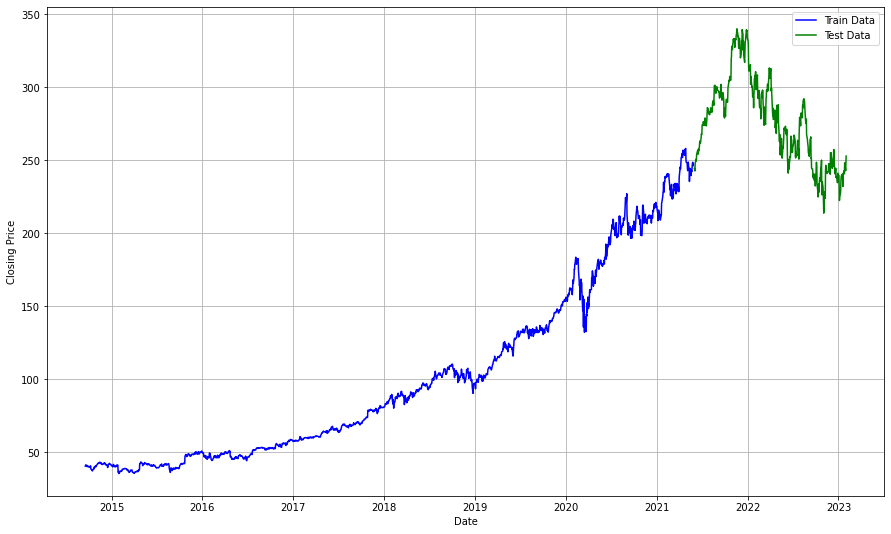

In [13]:
# Plotting train/ test data
plt.figure(figsize =(15,9))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel ('Closing Price')
plt.plot(df[0:to_row]['Adj Close'], 'blue', label ='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'green', label ='Test Data')
plt.legend()

In [14]:
# ARIMA model 
model_predictions = []
test_obs = len(test)


In [15]:
# Future prediction
for i in range(test_obs):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  # print('Prediction' ,yhat)

Y Hat - The estimated or predicted values in a regression or other predictive model are termed the y-hat values. "Y" because y is the outcome or dependent variable in the model equation, and a "hat" symbol (circumflex) placed over the variable name is the statistical designation of an estimated value.

In [16]:
# ARIMA model summary
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2107
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -5320.941
Method:                       css-mle   S.D. of innovations              3.024
Date:                Thu, 02 Feb 2023   AIC                          10653.881
Time:                        02:39:08   BIC                          10687.799
Sample:                             1   HQIC                         10666.302
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0982      0.055      1.773      0.076      -0.010       0.207
ar.L1.D.y     -0.1196      0.022     -5.487      0.000      -0.162      -0.077
ar.L2.D.y     -0.0158      0.022     -0.721      0.4

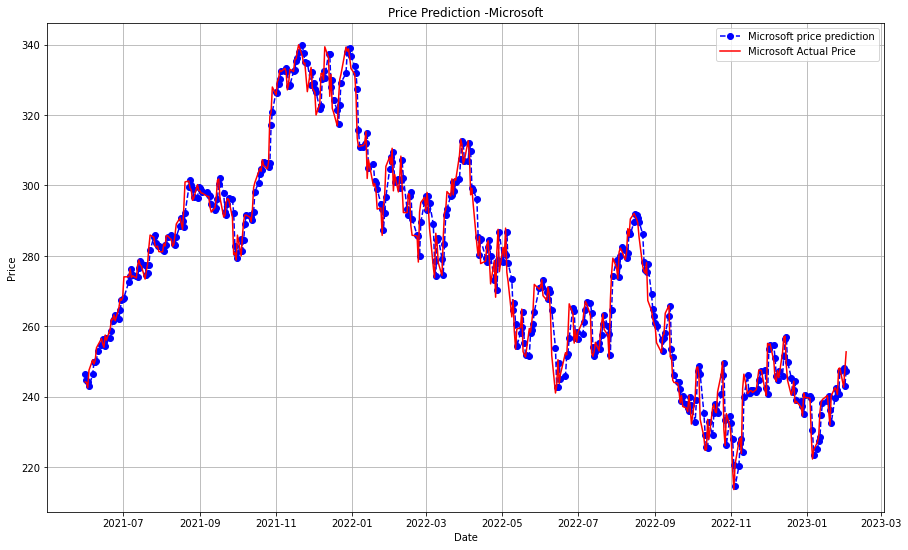

In [17]:
# Data visualization
plt.figure(figsize=(15,9))
plt.grid(True)
start_date = df[to_row:].index
plt.plot(start_date, model_predictions, color = 'blue', marker ='o', linestyle ='dashed', label ='Microsoft price prediction')
plt.plot(start_date, test, color ='red', label ='Microsoft Actual Price')
plt.title('Price Prediction -Microsoft')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
# Report performance
mape = np.mean(np.abs(np.array(model_predictions) -np.array(test))/np.abs(test))
# Checking Mean Absolute Percentage Error
print('MAPE:' +str(mape))

MAPE:0.0146733984776078


MAPE of 1.5% implies the model is 98.5% accurate in predicting the test obeservations

In [19]:
# Checking Root Mean Square Error
from math import sqrt
test = df[to_row:]['Adj Close']
print('Mean of test:',test.mean())
rmse = sqrt(mean_squared_error(test, model_predictions,))
print('Mean Squared Error:', rmse)

Mean of test: 276.5651981661105
Mean Squared Error: 5.234874086553825


In [20]:
# Prediction for next 5 days
prediction_next_5_days = []
for i in range(5):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  prediction_next_5_days.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  print('Prediction' ,yhat)

Prediction 252.41147199902167
Prediction 245.11588852484155
Prediction 244.13548364707168
Prediction 243.08981584456552
Prediction 247.18106932685384
